
# Data and cleaning



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from datetime import datetime, timedelta
import numpy as np

In [3]:
# read in dataframe
df = pd.read_csv('bike_sharing_dataset.csv')
df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01       NaN -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02       NaN  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03       NaN -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04       NaN -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05       NaN -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_freeze_rain  wt_snow  \
0     1.0           NaN         NaN  ...             NaN      NaN   
1     1.0           1.0         NaN  ...             NaN      NaN   
2     NaN           NaN         NaN  ...             NaN      NaN   
3     NaN           NaN         NaN  ...             NaN      NaN   
4     NaN           NaN         NaN  ...             NaN      NaN   

   wt_ground_fog  wt_ice_fog  wt_freeze_drizzle  wt_unknown  casual  \
0            NaN         NaN                NaN         NaN   330.0   
1            NaN         NaN                NaN         NaN   130.0   
2            NaN         NaN                NaN         NaN   120.0   
3            NaN         NaN                NaN         NaN   107.0   
4            NaN         NaN                NaN         NaN    82.0   

   registered  total_cust  holiday  
0       629.0       959.0      NaN  
1       651.0       781.0      NaN  
2      1181.0      1301.0      NaN  
3      1429.0      1536.0      NaN  
4      1489.0      1571.0      NaN  

[5 rows x 29 columns]

### Deal with all missing data


In [5]:
# Create list of weather conditions
weather_columns = [
    'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet',
    'wt_hail', 'wt_glaze', 'wt_haze', 'wt_drift_snow',
    'wt_high_wind', 'wt_mist', 'wt_drizzle', 'wt_rain',
    'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
    'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown'
]

# Fill missing values in categorical one-hot-encoding variables
df[weather_columns] = df[weather_columns].fillna(0)
df['holiday'] = df['holiday'].fillna(0)

# Update temp_avg column
df['temp_avg'] = (df['temp_min'] + df['temp_max'])/2

# Drop rows without total customer information
df.dropna(subset=['total_cust'], inplace=True)

df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01  5.203333 -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02  7.343333  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03  2.010714 -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04 -0.657143 -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05  0.910000 -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_freeze_rain  wt_snow  \
0     1.0           0.0         0.0  ...             0.0      0.0   
1     1.0           1.0         0.0  ...             0.0      0.0   
2     0.0           0.0         0.0  ...             0.0      0.0   
3     0.0           0.0         0.0  ...             0.0      0.0   
4     0.0           0.0         0.0  ...             0.0      0.0   

   wt_ground_fog  wt_ice_fog  wt_freeze_drizzle  wt_unknown  casual  \
0            0.0         0.0                0.0         0.0   330.0   
1            0.0         0.0                0.0         0.0   130.0   
2            0.0         0.0                0.0         0.0   120.0   
3            0.0         0.0                0.0         0.0   107.0   
4            0.0         0.0                0.0         0.0    82.0   

   registered  total_cust  holiday  
0       629.0       959.0      0.0  
1       651.0       781.0      0.0  
2      1181.0      1301.0      0.0  
3      1429.0      1536.0      0.0  
4      1489.0      1571.0      0.0  

[5 rows x 29 columns]

### Create an attribute for season

In [7]:
# create a list of dates that are in the datetime object
datetime_list = []
for index in df.index:
    datetime_list.append(datetime.strptime(df['date'][index], '%Y-%m-%d'))

# create a new attribute in dataframe which has the datetime objects
df['datetime_date'] = datetime_list

df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01  5.203333 -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02  7.343333  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03  2.010714 -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04 -0.657143 -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05  0.910000 -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_snow  wt_ground_fog  wt_ice_fog  \
0     1.0           0.0         0.0  ...      0.0            0.0         0.0   
1     1.0           1.0         0.0  ...      0.0            0.0         0.0   
2     0.0           0.0         0.0  ...      0.0            0.0         0.0   
3     0.0           0.0         0.0  ...      0.0            0.0         0.0   
4     0.0           0.0         0.0  ...      0.0            0.0         0.0   

   wt_freeze_drizzle  wt_unknown  casual  registered  total_cust  holiday  \
0                0.0         0.0   330.0       629.0       959.0      0.0   
1                0.0         0.0   130.0       651.0       781.0      0.0   
2                0.0         0.0   120.0      1181.0      1301.0      0.0   
3                0.0         0.0   107.0      1429.0      1536.0      0.0   
4                0.0         0.0    82.0      1489.0      1571.0      0.0   

   datetime_date  
0     2011-01-01  
1     2011-01-02  
2     2011-01-03  
3     2011-01-04  
4     2011-01-05  

[5 rows x 30 columns]

In [8]:
# define a function that can determine the season given a datetime object
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'fall': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['fall']:
        return 'fall'
    else:
        return 'winter'

# add season as a new attribute in the dataframe
df['season'] = df.datetime_date.map(season_of_date)


# Visualization 1: What are the trends of bike share use over time?


In [10]:
# create selection
selection = alt.selection_interval()

# display line chart with selection options
line_chart = alt.Chart(df).mark_line().encode(
    alt.Y('total_cust:Q', title = 'Number of bike share customers'),
    alt.X('date:T', title = 'Date'),
    alt.Tooltip(['date:T', 'total_cust:Q', 'temp_max:Q']),
    color = alt.value('brown')
).properties(
    title = 'Number of bike share customers from 2011-2018',
    width = 700
).add_params(
    selection
)

# create bar chart that will display for a given selection
bar_chart = alt.Chart(df).mark_bar().encode(
    alt.Y('count()'),
    alt.X('season:N'),
    color = alt.value('brown')
).transform_filter(
    selection
).properties(
    title = 'Season'
)

# display charts
line_chart | bar_chart

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

This is a line graph that represents the overall trend of data over time. More specifically, it displays the number of bike share customers each day from 2011 to 2018 in Washington D.C. There is an interactive component to the plot where if you select a section of data on the line plot, a bar chart will populate to the right that has information about the number of entries in each season.

It can be seen that there is a cyclical trend in the data where every year, there is a rise and fall of the data corresponding to the seasons (for example, there is usually a relative peak in the data around July and a relative minimum in the data around January). Additionally, it can be observed that the data has a positive trend overall indicating that as time has gone on, more and more customers have started using the bike share system, especially in the summer months. This suggests that the bike share system has increased in popularity over time and also indicates that more people are likely to use the bike share system during the warmer seasons.


# Visualization 2: How does weather type impact total customers?

In [13]:
# create secondary dataframe with only weather and customer data
weather_columns = [col for col in df.columns if col.startswith('wt_')]
weather_data = df[weather_columns + ['total_cust']]

# melt dataframe
weather_melted = weather_data.melt(id_vars=['total_cust'],
                                   var_name='weather_type',
                                   value_name='occurrence')
weather_melted = weather_melted[weather_melted['occurrence'] == 1]

# calculate mean customers for each weather type
mean_customers = weather_melted.groupby('weather_type', as_index=False)['total_cust'].mean()

# plot bar chart of mean customers for each weather type
weather_bar_chart = alt.Chart(mean_customers).mark_bar(color='skyblue').encode(
    x=alt.X('weather_type:N', sort='-y', title='Weather Type'),
    y=alt.Y('total_cust:Q', title='Mean of Total Customers'),
    tooltip=['weather_type:N', alt.Tooltip('total_cust:Q', title='Mean Customers')]
).properties(
    title="Impact of Weather Types on Total Customers",
    width=500,
    height=400
)

# display chart
weather_bar_chart

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

We were then curious to see trends in weather type and how it might affect bike-share usage. The bar chart illustrates how various weather conditions influence the mean number of total customers. Notably, days with thunder attract the highest average number of customers, approximately 9,000, followed by days with fog, haze, and hail, all exceeding an average of 7,000 customers. Heavy fog and high wind also show relatively high customer counts, indicating that these conditions do not significantly deter customer activity. In contrast, less favorable weather types such as freezing drizzle, drifting snow, freezing rain, and unknown conditions correspond to lower mean customer numbers, with averages below 4,000. This suggests that adverse or uncertain weather conditions may negatively impact customer turnout, whereas more stable or dramatic weather conditions, like thunder or fog, might either be less impactful or even coincide with increased activity due to other factors. Overall, the chart provides insight into how different weather types correlate with customer behavior.



# Visualization 3: How do casual and registered customers differ?

In [16]:
# create histogram of casual customers
casual = alt.Chart(df).mark_bar().encode(
    alt.X('casual:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Y('count()'),
    color = alt.value('goldenrod')
).properties(width = 200, height = 200, title = 'Distribution of Casual customers')

# create histogram of registered customers
registered = alt.Chart(df).mark_bar().encode(
    alt.X('registered:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Y('count()'),
    color = alt.value('goldenrod')
).properties(width = 200, height = 200, title = 'Distribution of Registered customers')

# display graphs
casual | registered

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

We also noted that there was a distinction between casual and registered customers in the dataset, and wanted to see if there were any differences that could be seen with these variables. We created histograms of the distribution of casual and registered customers, where it can be seen that the casual distribution has a lower mean and is positively skewed, while the registered distribution is fairly symmetrical with a higher mean. This suggests that it's more likely for there to be a high number of registered customers on any given day than it is for there to be casual customers, which might indicate customers who are registered are more consistently using the bike share platform.



# Visualization 4: How does precipitation impact the total customers?

In [19]:
# create dropdown buttons for diff customer types
dropdown = alt.binding_select(
    options=['casual', 'registered', 'total_cust'],
    labels=['Casual', 'Registered', 'Total (both casual and registered)'],
    name='Customer Status'
)
ycol_param = alt.param(
    value='casual',
    bind=dropdown
)

# create chart with precipitation and dropdown for diff customer types
precip_chart = alt.Chart(df).mark_circle().encode(
    alt.Tooltip(['date']),
    y=alt.Y('y:Q', title='Number of Customers', scale=alt.Scale(domain=[0, 20000])),
    x=alt.X('precip:Q', title='Precipitation (mm)'),
    color = alt.value('purple')
).transform_calculate(
    y=f'datum[{ycol_param.name}]'
).add_params(
    ycol_param
).properties(
    title = 'Effect of Precipitation on Bike-Share Use'
)

# display chart
precip_chart

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

After observing that both weather type and customer registration status could affect bike-share usage, we then wanted to explore the interplay of these factors. This visualization shows the relationship between bike-sharing rentals and precipitation, with three views: casual customers, registered customers, and total customers (casual + registered). The interactive dropdown on this plot can be used to switch between the views. This plot reveals how different types of customers respond to weather conditions, with casual customers generally showing a stronger decline in rentals as precipitation increases, while registered customers may be less affected due to regular use for commuting. The total customer plot combines both groups, offering insights into overall bike rental trends in response to precipitation (in general, higher precipitation leads to lower bike-share usage).

# Visualization 5: How does temperature impact the total customers?


(D3 visualization for Max Temperature vs Total Customers)
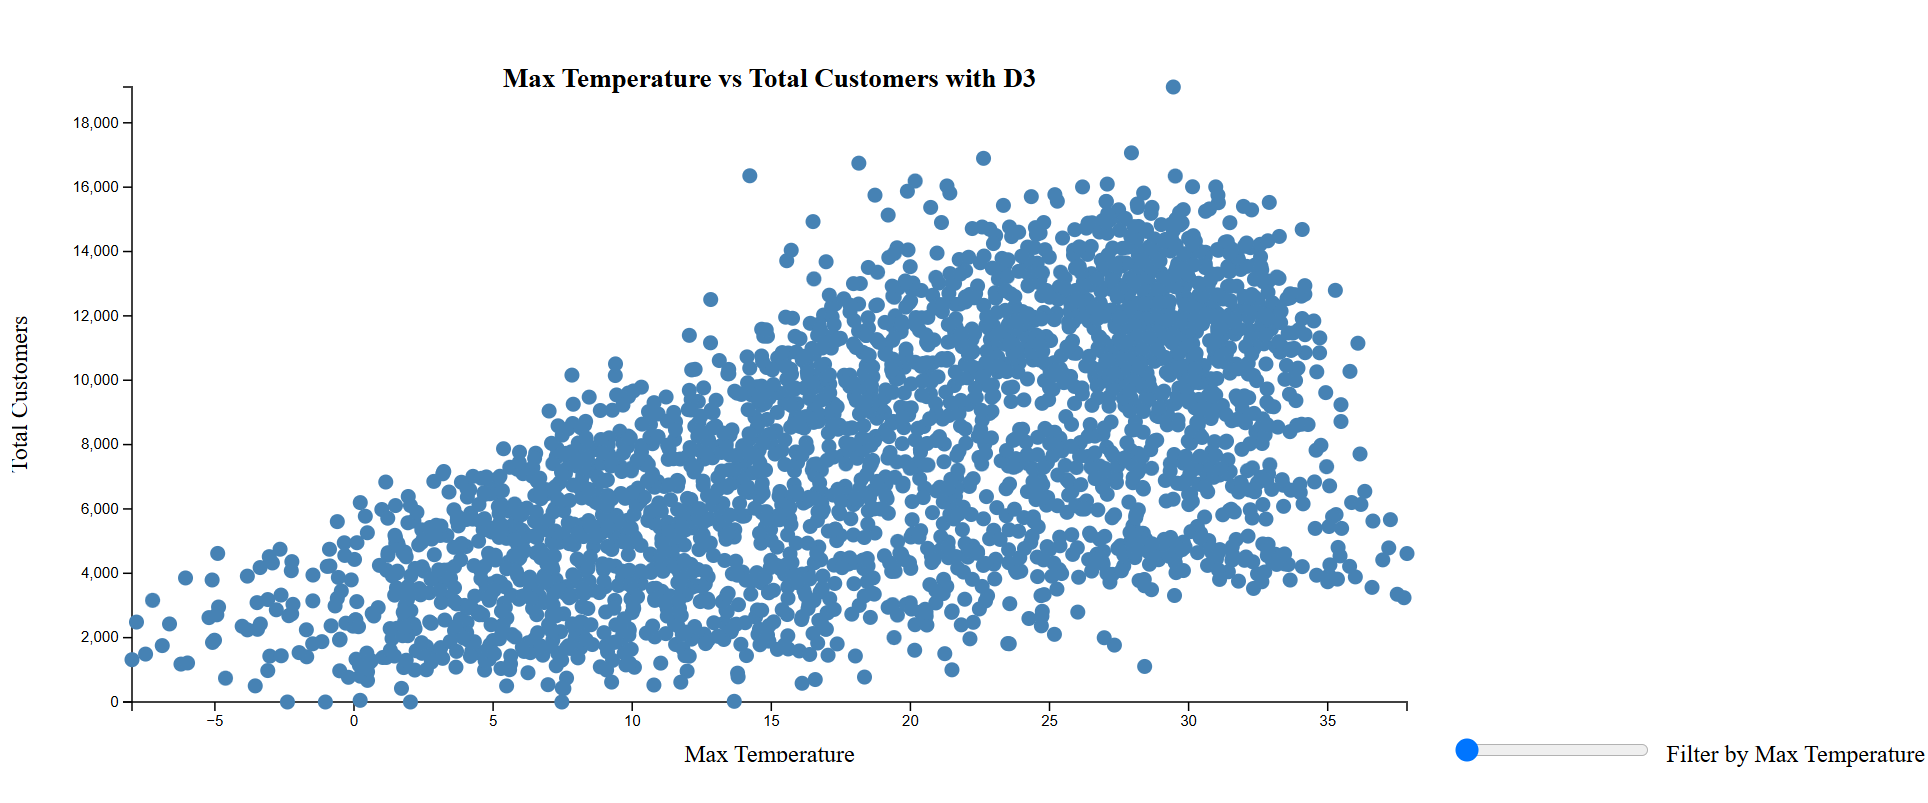

This visualization shows the relationship between maximum temperature and the total number of bike-sharing customers. We can see that as the temperature increases, the number of customers generally increases. This means that warmer days encourage more people to use the bike system, while colder days have lower amount of customers. However, extreme temperatures above 30°C seem to result in fewer users as well.

This plot was created using D3 / javascript, so a screenshot has been provided above.
